# Ridge and Tube detection

Ridges, in 2d, and Tube, in 3d, are structure requiering more advance filter to detect. Indeed, as they can be characterise in 2d as a double edge, any gradient filtering will produce a double response making the detection not trivial. Ridge detector rely instead on the hessian matrix eigen values response. An iconic filter is the Sato Filter [(Sato et. al., 1998)](https://doi.org/10.1016/S1361-8415(98)80009-1) which we can use in pyclesperanto

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pyclesperanto as cle

from skimage import data
from skimage.io import imread

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.247.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

### Example

The Sato Filter is configure to detected dark ridges (also called valley) of an image for a provided sigma range. Here the sigma is directly related to the scale of the ridge we are looking to detect. Low sigma for narrow ridge, large sigma for wide ridges.

> Warning: the algorithm operate a cumulation over the sigma range which, if a large range is provided, can add noise to the detect.  

With this first example, we start by inverting the image as the ridges are light in the raw data

In [6]:
inverted = -data.brick() 
response = cle.sato_filter(inverted, sigma_minimum=1, sigma_maximum=4, sigma_step=1)

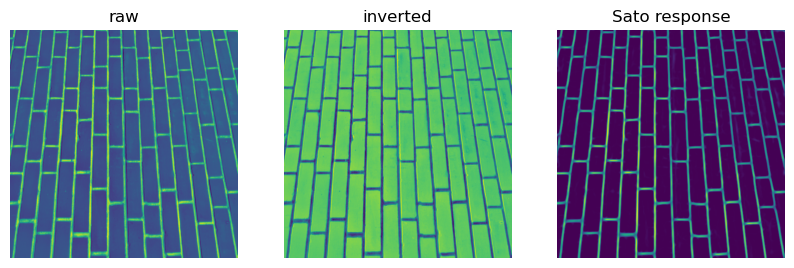

In [8]:
fig, axs = plt.subplots(1,3, figsize=(10,30))
axs[0].imshow(data.brick() )
axs[0].set_title("raw")
axs[1].imshow(inverted)
axs[1].set_title("inverted")
axs[2].imshow(response)
axs[2].set_title("Sato response")
for ax in axs:
    ax.axis('off')
plt.show()

Here, for the eye retina, a slitly higher sigma allows to detect the small as well as the large blood vessel. Here we did not needed to inver the image as the vessel are dark.

In [14]:
image = ((data.retina().sum(2)) / 3)
response = cle.sato_filter(image, sigma_minimum=1, sigma_maximum=5, sigma_step=1)

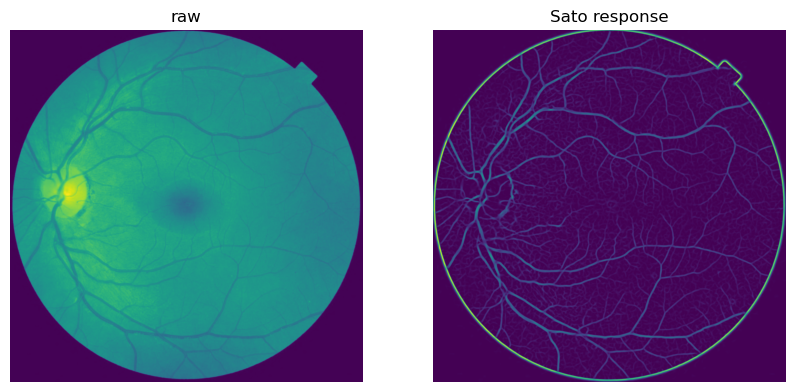

In [15]:
fig, axs = plt.subplots(1,2, figsize=(10,30))
axs[0].imshow(image)
axs[0].set_title("raw")
axs[1].imshow(response)
axs[1].set_title("Sato response")
for ax in axs:
    ax.axis('off')
plt.show()

## 3D Images and Tube detection

The Sato filter is detecting ridge for 2d image, but in 3d the response will be high for tube structure. let's load an image of 3D cell membrane for the demonstration.
We will again need to invert the image as the cell membranes are bright.

In [17]:
image = imread("https://github.com/clEsperanto/clesperanto_example_data/raw/main/EM_C_6_c0.tif").astype(np.float32)
inverted = -image

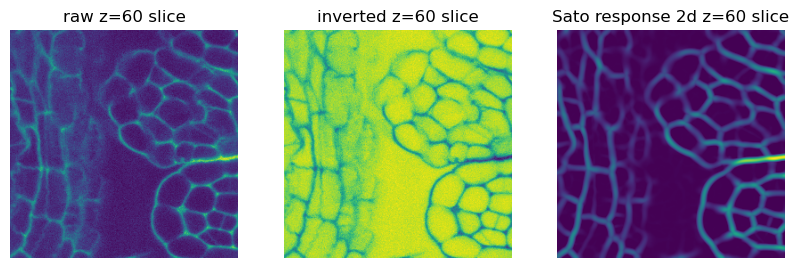

In [19]:
response = cle.sato_filter(inverted[60], sigma_minimum=1, sigma_maximum=5, sigma_step=1)
fig, axs = plt.subplots(1,3, figsize=(10,30))
axs[0].imshow(image[60])
axs[0].set_title("raw z=60 slice")
axs[1].imshow(inverted[60])
axs[1].set_title("inverted z=60 slice")
axs[2].imshow(response)
axs[2].set_title("Sato response 2d z=60 slice")
for ax in axs:
    ax.axis('off')
plt.show()

At a given slice of the volume, we can nicely improve the membrane using the filter in 2D. However, if applied in 3D, the membrane of the cell will not be a ridge or a tube anymore but will be a plannar structure. The filter will focus on tubular shape which, in this case will correspond to the membrane junctions.

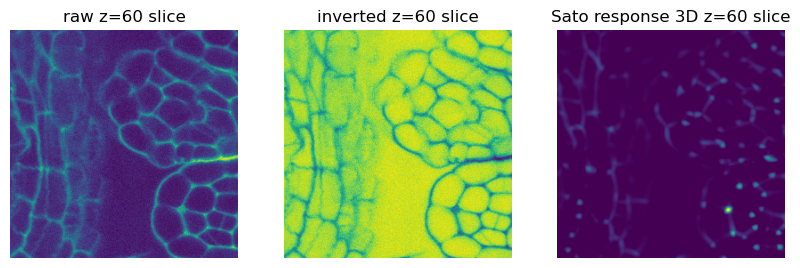

In [20]:
response = cle.sato_filter(inverted, sigma_minimum=1, sigma_maximum=5, sigma_step=1)
fig, axs = plt.subplots(1,3, figsize=(10,30))
axs[0].imshow(image[60])
axs[0].set_title("raw z=60 slice")
axs[1].imshow(inverted[60])
axs[1].set_title("inverted z=60 slice")
axs[2].imshow(response[60])
axs[2].set_title("Sato response 3D z=60 slice")
for ax in axs:
    ax.axis('off')
plt.show()

This response is easier to visualise in a 3d viewer such as napari

In [22]:
import napari

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(image, name="raw")
viewer.add_image(response, name="Sato response", colormap='viridis')

napari.run()

Cheers, and have fun with this filter!